## Регрессия на imdb

In [1]:
# ячейка импортов
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# место для импорта регрессионных моделей
# ...

In [2]:
from google.colab import files
files.upload()

Saving imdb.zip to imdb.zip


{'imdb.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xd6<\xaaR\xc3\xcb\xcc\x91\xff\xff\xff\xff\xff\xff\xff\xff\x13\x00\x14\x00IMDB-Movie-Data.csv\x01\x00\x10\x00\x07\xba\x04\x00\x00\x00\x00\x00\xe6\x17\x02\x00\x00\x00\x00\x00\xa4\xbdKo$Y\xd2%\xb6/\xa0\xfe\x83\x8b\x10\x90\xdd\x803\x14\xefGm>\x90L\x92\xf9 +9dvq\xbav7"nDx\xd1\xc3o\xb4?\xc8\x0c\xfe\rm\xb4\xed\x85\x005\x04-\x06\xd0n\xb4R\xfe1\x9dcv\xaf\xbb\x07\xc9\xca\xaf\x07\x1a\xccW\x9d$\xe3\xe1~\xdd\x1e\xc7\xcc\x8e\x99\xdd\x9a\xec!\xfe\x9a\x94\xa9\x8d/m\x96\xdb\xf8\xbd-\x16y\xb2+\x13\x97\xc5\xef\x93\xdc.J\x97\xc7\'\xfco\x11\xff\xdd\x9a<\xbe\xad\xb22\xd9\xda\xe8/\xd7IV\x95\xb6\xf8k|k\xca$[\xc7\xbf9\xfc\x14\xdf\xdaG\x9bU\xf2\xe74\xc5\x87\xe0\xef\xd7\xb64\xc5\xc2\xe5\xf6\xe7\x9fz\xf1ee\xf2eb\xb2"r\xab\xa8\xdc\xd8\xe8\xd2\xa4\xe6\xdb>>\xc2w\xf0;O\x96x\x7fY\xe1J\xee\x16\xc9\xf1Er\x14\x9fD\xeb\xdcU;\xbe>\xc9J\x9b\xaf\xf1\x06\xbcv\x11\xe1:\xb7If\xd2"2\xb9\x8dV._\xd8eT\xba\xe8\xc9\xe5\x0f\xf8\xdf\xb5\xc5\xc7\xe7\xfcEQ\xba]d\xa2\x95\xc9p\xa5\x0b\x93FO&

In [3]:
! unzip "imdb.zip" 

Archive:  imdb.zip
  inflating: IMDB-Movie-Data.csv     


In [31]:
data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [32]:
data.rename({'Rank':'rank', 'Title':'title', 'Genre':'genre',
                    'Description':'desc', 'Director':'dir', 'Actors':'act',
                    'Year':'year', 'Runtime (Minutes)':'runtime(min)','Rating':'rate','Votes':'votes','Revenue (Millions)':'rev(mln)','Metascore':'meta' }, 
                    axis=1, inplace=True)

In [ ]:
data.describe()

,rank,year,runtime(min),rate,votes,rev(mln),meta
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [43]:
data.fillna(0, inplace=True)

In [ ]:
data.describe()

,rank,year,runtime(min),rate,votes,rev(mln),meta
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,72.337960,55.210000
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,100.320314,22.030598
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,0.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,3.352500,43.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,37.145000,58.000000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


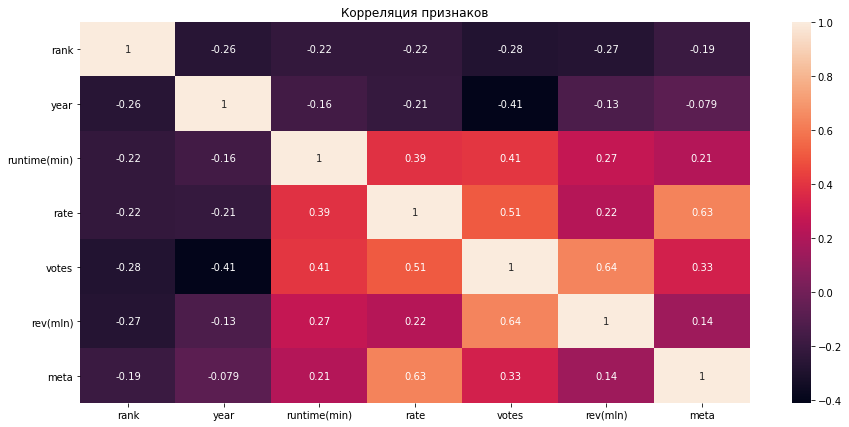

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(data=data.corr(), annot=True, cmap= "rocket") 
# дополнительные цветовые схемы https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title("Корреляция признаков") # подпись графика
plt.show()

In [ ]:
data.groupby('dir').agg(['mean'])

,rank,year,runtime(min),rate,votes,rev(mln),meta
,mean,mean,mean,mean,mean,mean,mean
dir,,,,,,,
Aamir Khan,992.0,2007.00,165.00,8.50,102697.00,1.200,42.0
Abdellatif Kechiche,312.0,2013.00,180.00,7.80,103150.00,2.200,88.0
Adam Leon,784.0,2016.00,82.00,6.50,1031.00,NaN,77.0
Adam McKay,477.5,2009.75,110.75,7.00,201706.75,109.535,65.5
Adam Shankman,730.0,2009.50,120.00,6.30,83733.50,78.665,64.0
...,...,...,...,...,...,...,...
Xavier Dolan,794.0,2015.00,118.00,7.55,22109.00,3.490,61.0
Yimou Zhang,6.0,2016.00,103.00,6.10,56036.00,45.130,42.0


In [ ]:
#data.groupby('dir').mean()[['rate']].sort_values(by = ['rate'], ascending = False)
#data.groupby('genre').mean()[['rev(mln)']].sort_values(by = ['rev(mln)'], ascending = False)
#data.groupby('dir').mean()[['rev(mln)']].sort_values(by = ['rev(mln)'], ascending = False)
data.groupby('dir').mean()[['year']].sort_values(by = ['year'], ascending = False)


,year
dir,
Mick Jackson,2016.0
Sean Ellis,2016.0
So Yong Kim,2016.0
David Mackenzie,2016.0
Josh Gordon,2016.0
...,...
Werner Herzog,2006.0
Sofia Coppola,2006.0
Andy Fickman,2006.0


## Регрессии:

В этом датасете для регрессии есть несколько опций, выбирайте то, что более интересно: 

- определить рейтинг по описанию фильма
- определить длительность фильма по году создания
- определить рейтинг по длине фильма
- Ваша идея

Шаги выполнения: 
- Определите, какие части датасета необходимы для вашей задачи
- Если работаете с текстовыми ячейками, векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку
- Попробуйте обучить [разные регрессионные модели](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (не забудьте импортировать их в эту тетрадку)

- Для каждой модели посмотрите на метрики. 

Какая/какие модель/ли справляются с выбранной Вами задачей наиболее эффективно?

#Длительность фильма по году создания

In [ ]:
data1 = data[['year','runtime(min)']]
data1.head(3)

,year,runtime(min)
0,2014,121
1,2012,124
2,2016,117


In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data2 = data1.drop('runtime(min)', axis=1)
X = data2.values # выбросили из датафрейма информацию про ветер

#display(X, X.shape)

In [ ]:
y = data1['runtime(min)'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # создали переменные, разделили данные

In [ ]:
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

14.679234935136067

In [ ]:
regressor = Lasso(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

14.679390355319374

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)#Линейная регрессия с этим предсказанием справляется лучше

14.679234762532069

#Рейтинг по длине фильма

In [ ]:
data_rate = data[['rate','runtime(min)']]
data_pred = data_rate.drop('rate', axis=1)
X = data_pred.values # выбросили из датафрейма информацию про ветер
y = data_rate['rate'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # создали переменные, разделили данные

In [ ]:
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)#Лучший результат

0.6796313439205528

In [ ]:
regressor = Lasso(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

0.6796455900495755

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)#Я правильно понимаю, что раз ему так хорошо удалось предсказать рейтинг, значит, между этими параметрами дейстительно сильная корреляция?

0.6796313435500155

##Рейтинг по описанию фильма

In [6]:
data1 = data[['rate','desc']]
data1.head(3)
etalon = data.drop(['title','text', 'subject','date'], axis=1)

,rate,desc
0,8.1,A group of intergalactic criminals are forced ...
1,7.0,"Following clues to the origin of mankind, a te..."
2,7.3,Three girls are kidnapped by a man with a diag...


In [10]:
def preprocess_text(text):
    from string import punctuation
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    tokens = text.lower().translate(str.maketrans('','',punctuation)).split()
    tokens_clean = []
    for x in tokens:
        if x!= " ":
            tokens_clean.append(x)
    
    text = " ".join(tokens_clean)
    
    return text
    


#data1['clean_text'] = data.text.apply(lambda x: preprocess_text(x))

In [16]:
data['clean_text'] = data.desc.apply(lambda x: preprocess_text(x))

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words="english",
                                   max_features=100) # можно менять параметры векторайзера

feature_matrix = vectorizer.fit_transform(data.clean_text)
# здесь матрица с tf-idf-скорами топ n слов (= число в max_features)

In [14]:
# добавим эту матрицу к датафрейму
import scipy.sparse

word_features= pd.DataFrame.sparse.from_spmatrix(feature_matrix)
# print(word_features.shape)


data = pd.concat([data, word_features], axis=1).dropna()

In [21]:
etalon = data.drop(['rank','title', 'genre','dir','act','year','runtime(min)','votes','rev(mln)','meta','desc','clean_text'], axis=1)

display(etalon.head(2))

,rate,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.501508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438956,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.514314,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539712,0.0,0.0,0.0,0.0
1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523657,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.637478,0.000000,0.0,0.0,0.0,0.0,0.56516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [22]:
etalon1 = etalon.drop('rate', axis=1)

In [24]:
X = etalon1.values
y = etalon['rate'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)#лучший результат
#mean_squared_error(y_test, preds)

0.704490166364197

In [29]:
regressor = Lasso(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

0.7150368815971465

In [30]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

0.7056884211132705

##Рейтинг фильма по сборам

In [44]:
data_rev = data[['rate','rev(mln)']]
data_rev.head(3)

,rate,rev(mln)
0,8.1,333.13
1,7.0,126.46
2,7.3,138.12


In [45]:
data_rev2 = data_rev.drop('rate', axis=1)
X = data_rev2.values # выбросили из датафрейма информацию про ветер

#display(X, X.shape)

In [46]:
y = data_rev['rate'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)

0.7502676710336578

In [49]:
regressor = Lasso(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds)#лучший результат, хоть и ненамного)

0.7502515566755363

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)
#mean_squared_error(y_test, preds

0.7502676710875437